<a href="https://colab.research.google.com/github/SenolIsci/ML-Model-Starters/blob/main/CNN_Models_for_Human_Activity_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Convolutional Neural Network Models for Human Activity Recognition
* Activity Recognition Using Smartphones Dataset
* Develop 1D Convolutional Neural Network
* Tuned 1D Convolutional Neural Network
* Multi-Headed 1D Convolutional Neural Network

##Convolutional Neural Network Models for Human Activity Recognition

Human Activity Recognition, or HAR for short, is the problem of predicting what a person is doing based on a trace of their movement using sensors.

Classical approaches to the problem involve hand crafting features from the time series data based on fixed-sized windows and training machine learning models, such as ensembles of decision trees. The difficulty is that this feature engineering requires deep expertise in the field.

Recently, deep learning methods such as recurrent neural networks and one-dimensional convolutional neural networks, or CNNs, have been shown to provide state-of-the-art results on challenging activity recognition tasks with little or no data feature engineering, instead using feature learning on raw data.

A standard human activity recognition dataset is the ‘Activity Recognition Using Smart Phones Dataset’ made available in 2012.

The dataset was made available and can be downloaded for free from the UCI Machine Learning Repository:

[Human Activity Recognition Using Smartphones Data Set, UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones)

The data was collected from 30 subjects aged between 19 and 48 years old performing one of six standard activities while wearing a waist-mounted smartphone that recorded the movement data. Video was recorded of each subject performing the activities and the movement data was labeled manually from these videos.

1D Convolutional Neural Network Models for Human Activity Recognition
by Jason Brownlee on September 21, 2018 in Deep Learning for Time Series
Tweet Tweet  Share
Last Updated on August 28, 2020

Human activity recognition is the problem of classifying sequences of accelerometer data recorded by specialized harnesses or smart phones into known well-defined movements.

Classical approaches to the problem involve hand crafting features from the time series data based on fixed-sized windows and training machine learning models, such as ensembles of decision trees. The difficulty is that this feature engineering requires deep expertise in the field.

Recently, deep learning methods such as recurrent neural networks and one-dimensional convolutional neural networks, or CNNs, have been shown to provide state-of-the-art results on challenging activity recognition tasks with little or no data feature engineering, instead using feature learning on raw data.

In this tutorial, you will discover how to develop one-dimensional convolutional neural networks for time series classification on the problem of human activity recognition.

After completing this tutorial, you will know:

How to load and prepare the data for a standard human activity recognition dataset and develop a single 1D CNN model that achieves excellent performance on the raw data.
How to further tune the performance of the model, including data transformation, filter maps, and kernel sizes.
How to develop a sophisticated multi-headed one-dimensional convolutional neural network model that provides an ensemble-like result.
Kick-start your project with my new book Deep Learning for Time Series Forecasting, including step-by-step tutorials and the Python source code files for all examples.

Let’s get started.

How to Develop 1D Convolutional Neural Network Models for Human Activity Recognition
How to Develop 1D Convolutional Neural Network Models for Human Activity Recognition
Photo by Wolfgang Staudt, some rights reserved.

Tutorial Overview
This tutorial is divided into four parts; they are:

Activity Recognition Using Smartphones Dataset
Develop 1D Convolutional Neural Network
Tuned 1D Convolutional Neural Network
Multi-Headed 1D Convolutional Neural Network

Activity Recognition Using Smartphones Dataset
Human Activity Recognition, or HAR for short, is the problem of predicting what a person is doing based on a trace of their movement using sensors.

A standard human activity recognition dataset is the ‘Activity Recognition Using Smart Phones Dataset’ made available in 2012.

It was prepared and made available by Davide Anguita, et al. from the University of Genova, Italy and is described in full in their 2013 paper “A Public Domain Dataset for Human Activity Recognition Using Smartphones.” The dataset was modeled with machine learning algorithms in their 2012 paper titled “Human Activity Recognition on Smartphones using a Multiclass Hardware-Friendly Support Vector Machine.”

The dataset was made available and can be downloaded for free from the UCI Machine Learning Repository:

Human Activity Recognition Using Smartphones Data Set, UCI Machine Learning Repository
The data was collected from 30 subjects aged between 19 and 48 years old performing one of six standard activities while wearing a waist-mounted smartphone that recorded the movement data. Video was recorded of each subject performing the activities and the movement data was labeled manually from these videos.

Below is an example video of a subject performing the activities while their movement data is being recorded.


The six activities performed were as follows:

Walking
Walking Upstairs
Walking Downstairs
Sitting
Standing
Laying
The movement data recorded was the x, y, and z accelerometer data (linear acceleration) and gyroscopic data (angular velocity) from the smart phone, specifically a Samsung Galaxy S II. Observations were recorded at 50 Hz (i.e. 50 data points per second). Each subject performed the sequence of activities twice, once with the device on their left-hand-side and once with the device on their right-hand side.

The raw data is not available. Instead, a pre-processed version of the dataset was made available. The pre-processing steps included:

Pre-processing accelerometer and gyroscope using noise filters.
Splitting data into fixed windows of 2.56 seconds (128 data points) with 50% overlap.
Splitting of accelerometer data into gravitational (total) and body motion components.
Feature engineering was applied to the window data, and a copy of the data with these engineered features was made available.

A number of time and frequency features commonly used in the field of human activity recognition were extracted from each window. The result was a 561 element vector of features.

The dataset was split into train (70%) and test (30%) sets based on data for subjects, e.g. 21 subjects for train and nine for test.

There are three main signal types in the raw data: total acceleration, body acceleration, and body gyroscope. Each has three axes of data. This means that there are a total of nine variables for each time step.

Further, each series of data has been partitioned into overlapping windows of 2.65 seconds of data, or 128 time steps. These windows of data correspond to the windows of engineered features (rows) in the previous section.

The signals are stored in the /Inertial Signals/ directory under the train and test subdirectories. Each axis of each signal is stored in a separate file, meaning that each of the train and test datasets have nine input files to load and one output file to load. 

To make this clearer, there are 128 time steps and nine features, where the number of samples is the number of rows in any given raw signal data file.


#Develop 1D Convolutional Neural Network

In [11]:
# cnn model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y

# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
	# load all train
	trainX, trainy = load_dataset_group('train', prefix + 'HARDataset/')
	print(trainX.shape, trainy.shape)
	# load all test
	testX, testy = load_dataset_group('test', prefix + 'HARDataset/')
	print(testX.shape, testy.shape)
	# zero-offset class values
	trainy = trainy - 1
	testy = testy - 1
	# one hot encode y
	trainy = to_categorical(trainy)
	testy = to_categorical(testy)
	print(trainX.shape, trainy.shape, testX.shape, testy.shape)
	return trainX, trainy, testX, testy

# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy):
	verbose, epochs, batch_size = 0, 10, 32
	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
	model = Sequential()
	model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
	model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
	model.add(Dropout(0.5))
	model.add(MaxPooling1D(pool_size=2))
	model.add(Flatten())
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
	model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
	# evaluate model
	_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
	return accuracy

# summarize scores
def summarize_results(scores):
	print(scores)
	m, s = mean(scores), std(scores)
	print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

# run an experiment
def run_experiment(repeats=1):
	# load data
	trainX, trainy, testX, testy = load_dataset()
	# repeat experiment
	scores = list()
	for r in range(repeats):
		score = evaluate_model(trainX, trainy, testX, testy)
		score = score * 100.0
		print('>#%d: %.3f' % (r+1, score))
		scores.append(score)
	# summarize results
	summarize_results(scores)

# run the experiment
run_experiment()

(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)
>#1: 91.076
[91.07567071914673]
Accuracy: 91.076% (+/-0.000)


#Tuned 1D Convolutional Neural Network

##Standardization/Scaling

(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)
>p=False #1: 90.974
>p=False #2: 89.515
>p=False #3: 90.465
>p=True #1: 89.345
>p=True #2: 91.483
>p=True #3: 91.144
[[90.97387194633484, 89.51476216316223, 90.46487808227539], [89.34509754180908, 91.48286581039429, 91.14353656768799]] [False, True]
Param=False: 90.318% (+/-0.605)
Param=True: 90.657% (+/-0.938)


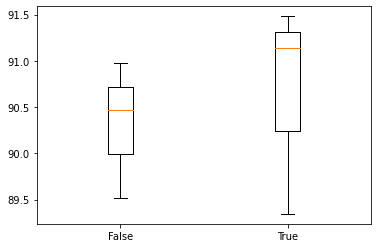

In [12]:
# cnn model with standardization
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y

# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
	# load all train
	trainX, trainy = load_dataset_group('train', prefix + 'HARDataset/')
	print(trainX.shape, trainy.shape)
	# load all test
	testX, testy = load_dataset_group('test', prefix + 'HARDataset/')
	print(testX.shape, testy.shape)
	# zero-offset class values
	trainy = trainy - 1
	testy = testy - 1
	# one hot encode y
	trainy = to_categorical(trainy)
	testy = to_categorical(testy)
	print(trainX.shape, trainy.shape, testX.shape, testy.shape)
	return trainX, trainy, testX, testy

# standardize data
def scale_data(trainX, testX, standardize):
	# remove overlap
	cut = int(trainX.shape[1] / 2)
	longX = trainX[:, -cut:, :]
	# flatten windows
	longX = longX.reshape((longX.shape[0] * longX.shape[1], longX.shape[2]))
	# flatten train and test
	flatTrainX = trainX.reshape((trainX.shape[0] * trainX.shape[1], trainX.shape[2]))
	flatTestX = testX.reshape((testX.shape[0] * testX.shape[1], testX.shape[2]))
	# standardize
	if standardize:
		s = StandardScaler()
		# fit on training data
		s.fit(longX)
		# apply to training and test data
		longX = s.transform(longX)
		flatTrainX = s.transform(flatTrainX)
		flatTestX = s.transform(flatTestX)
	# reshape
	flatTrainX = flatTrainX.reshape((trainX.shape))
	flatTestX = flatTestX.reshape((testX.shape))
	return flatTrainX, flatTestX

# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy, param):
	verbose, epochs, batch_size = 0, 10, 32
	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
	# scale data
	trainX, testX = scale_data(trainX, testX, param)
	model = Sequential()
	model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
	model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
	model.add(Dropout(0.5))
	model.add(MaxPooling1D(pool_size=2))
	model.add(Flatten())
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
	model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
	# evaluate model
	_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
	return accuracy

# summarize scores
def summarize_results(scores, params):
	print(scores, params)
	# summarize mean and standard deviation
	for i in range(len(scores)):
		m, s = mean(scores[i]), std(scores[i])
		print('Param=%s: %.3f%% (+/-%.3f)' % (params[i], m, s))
	# boxplot of scores
	pyplot.boxplot(scores, labels=params)
	pyplot.savefig('exp_cnn_standardize.png')

# run an experiment
def run_experiment(params, repeats=3):
	# load data
	trainX, trainy, testX, testy = load_dataset()
	# test each parameter
	all_scores = list()
	for p in params:
		# repeat experiment
		scores = list()
		for r in range(repeats):
			score = evaluate_model(trainX, trainy, testX, testy, p)
			score = score * 100.0
			print('>p=%s #%d: %.3f' % (p, r+1, score))
			scores.append(score)
		all_scores.append(scores)
	# summarize results
	summarize_results(all_scores, params)

# run the experiment
n_params = [False, True]
run_experiment(n_params)

##Number of Filters

(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)
>p=8 #1: 89.854
>p=8 #2: 88.022
>p=8 #3: 90.261
>p=16 #1: 89.820
>p=16 #2: 90.465
>p=16 #3: 89.243
>p=32 #1: 88.429
>p=32 #2: 90.058
>p=32 #3: 91.279
>p=64 #1: 92.229
>p=64 #2: 91.279
>p=64 #3: 91.313
>p=128 #1: 89.684
>p=128 #2: 90.940
>p=128 #3: 90.635
>p=256 #1: 89.311
>p=256 #2: 91.347
>p=256 #3: 90.736
[[89.85409140586853, 88.021719455719, 90.26128053665161], [89.8201584815979, 90.46487808227539, 89.24329876899719], [88.42890858650208, 90.05768299102783, 91.27926826477051], [92.22938418388367, 91.27926826477051, 91.31320118904114], [89.68442678451538, 90.93993902206421, 90.63454270362854], [89.31116461753845, 91.34713411331177, 90.73634147644043]] [8, 16, 32, 64, 128, 256]
Param=8: 89.379% (+/-0.974)
Param=16: 89.843% (+/-0.499)
Param=32: 89.922% (+/-1.168)
Param=64: 91.607% (+/-0.440)
Param=128: 90.420% (+/-0.535)
Param=256: 90.465% (+/-0.853)


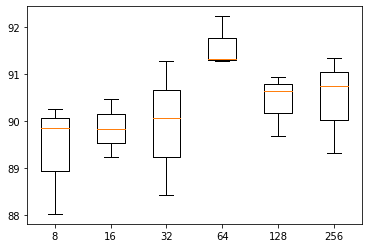

In [13]:
# cnn model with filters
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y

# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
	# load all train
	trainX, trainy = load_dataset_group('train', prefix + 'HARDataset/')
	print(trainX.shape, trainy.shape)
	# load all test
	testX, testy = load_dataset_group('test', prefix + 'HARDataset/')
	print(testX.shape, testy.shape)
	# zero-offset class values
	trainy = trainy - 1
	testy = testy - 1
	# one hot encode y
	trainy = to_categorical(trainy)
	testy = to_categorical(testy)
	print(trainX.shape, trainy.shape, testX.shape, testy.shape)
	return trainX, trainy, testX, testy

# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy, n_filters):
	verbose, epochs, batch_size = 0, 10, 32
	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
	model = Sequential()
	model.add(Conv1D(filters=n_filters, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
	model.add(Conv1D(filters=n_filters, kernel_size=3, activation='relu'))
	model.add(Dropout(0.5))
	model.add(MaxPooling1D(pool_size=2))
	model.add(Flatten())
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
	model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
	# evaluate model
	_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
	return accuracy

# summarize scores
def summarize_results(scores, params):
	print(scores, params)
	# summarize mean and standard deviation
	for i in range(len(scores)):
		m, s = mean(scores[i]), std(scores[i])
		print('Param=%d: %.3f%% (+/-%.3f)' % (params[i], m, s))
	# boxplot of scores
	pyplot.boxplot(scores, labels=params)
	pyplot.savefig('exp_cnn_filters.png')

# run an experiment
def run_experiment(params, repeats=3):
	# load data
	trainX, trainy, testX, testy = load_dataset()
	# test each parameter
	all_scores = list()
	for p in params:
		# repeat experiment
		scores = list()
		for r in range(repeats):
			score = evaluate_model(trainX, trainy, testX, testy, p)
			score = score * 100.0
			print('>p=%d #%d: %.3f' % (p, r+1, score))
			scores.append(score)
		all_scores.append(scores)
	# summarize results
	summarize_results(all_scores, params)

# run the experiment
n_params = [8, 16, 32, 64, 128, 256]
run_experiment(n_params)

##Size of Kernel
The size of the kernel is another important hyperparameter of the 1D CNN to tune.

The kernel size controls the number of time steps consider in each “read” of the input sequence, that is then projected onto the feature map (via the convolutional process).

A large kernel size means a less rigorous reading of the data, but may result in a more generalized snapshot of the input.

(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)
>p=2 #1: 88.734
>p=2 #2: 89.650
>p=2 #3: 87.716
>p=3 #1: 91.720
>p=3 #2: 90.635
>p=3 #3: 91.279
>p=5 #1: 90.702
>p=5 #2: 87.275
>p=5 #3: 90.499
>p=7 #1: 92.263
>p=7 #2: 92.433
>p=7 #3: 91.754
>p=11 #1: 91.856
>p=11 #2: 93.247
>p=11 #3: 91.211
[[88.73430490493774, 89.65049386024475, 87.71632313728333], [91.7203962802887, 90.63454270362854, 91.27926826477051], [90.7024085521698, 87.27519512176514, 90.49881100654602], [92.2633171081543, 92.43298172950745, 91.75432920455933], [91.85612201690674, 93.24737191200256, 91.21140241622925]] [2, 3, 5, 7, 11]
Param=2: 88.700% (+/-0.790)
Param=3: 91.211% (+/-0.446)
Param=5: 89.492% (+/-1.570)
Param=7: 92.150% (+/-0.288)
Param=11: 92.105% (+/-0.850)


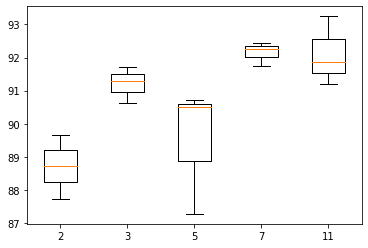

In [14]:
# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y

# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
	# load all train
	trainX, trainy = load_dataset_group('train', prefix + 'HARDataset/')
	print(trainX.shape, trainy.shape)
	# load all test
	testX, testy = load_dataset_group('test', prefix + 'HARDataset/')
	print(testX.shape, testy.shape)
	# zero-offset class values
	trainy = trainy - 1
	testy = testy - 1
	# one hot encode y
	trainy = to_categorical(trainy)
	testy = to_categorical(testy)
	print(trainX.shape, trainy.shape, testX.shape, testy.shape)
	return trainX, trainy, testX, testy

# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy, n_kernel):
	verbose, epochs, batch_size = 0, 15, 32
	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
	model = Sequential()
	model.add(Conv1D(filters=64, kernel_size=n_kernel, activation='relu', input_shape=(n_timesteps,n_features)))
	model.add(Conv1D(filters=64, kernel_size=n_kernel, activation='relu'))
	model.add(Dropout(0.5))
	model.add(MaxPooling1D(pool_size=2))
	model.add(Flatten())
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
	model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
	# evaluate model
	_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
	return accuracy

# summarize scores
def summarize_results(scores, params):
	print(scores, params)
	# summarize mean and standard deviation
	for i in range(len(scores)):
		m, s = mean(scores[i]), std(scores[i])
		print('Param=%d: %.3f%% (+/-%.3f)' % (params[i], m, s))
	# boxplot of scores
	pyplot.boxplot(scores, labels=params)
	pyplot.savefig('exp_cnn_kernel.png')

# run an experiment
def run_experiment(params, repeats=3):
	# load data
	trainX, trainy, testX, testy = load_dataset()
	# test each parameter
	all_scores = list()
	for p in params:
		# repeat experiment
		scores = list()
		for r in range(repeats):
			score = evaluate_model(trainX, trainy, testX, testy, p)
			score = score * 100.0
			print('>p=%d #%d: %.3f' % (p, r+1, score))
			scores.append(score)
		all_scores.append(scores)
	# summarize results
	summarize_results(all_scores, params)

# run the experiment
n_params = [2, 3, 5, 7, 11]
run_experiment(n_params)

#Multi-Headed Convolutional Neural Network
Another popular approach with CNNs is to have a multi-headed model, where each head of the model reads the input time steps using a different sized kernel.

For example, a three-headed model may have three different kernel sizes of 3, 5, 11, allowing the model to read and interpret the sequence data at three different resolutions. The interpretations from all three heads are then concatenated within the model and interpreted by a fully-connected layer before a prediction is made.

In [15]:
# multi-headed cnn model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import concatenate

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y

# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
	# load all train
	trainX, trainy = load_dataset_group('train', prefix + 'HARDataset/')
	print(trainX.shape, trainy.shape)
	# load all test
	testX, testy = load_dataset_group('test', prefix + 'HARDataset/')
	print(testX.shape, testy.shape)
	# zero-offset class values
	trainy = trainy - 1
	testy = testy - 1
	# one hot encode y
	trainy = to_categorical(trainy)
	testy = to_categorical(testy)
	print(trainX.shape, trainy.shape, testX.shape, testy.shape)
	return trainX, trainy, testX, testy

# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy):
	verbose, epochs, batch_size = 0, 10, 32
	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
 	# head 1
	inputs1 = Input(shape=(n_timesteps,n_features))
	conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(inputs1)
	drop1 = Dropout(0.5)(conv1)
	pool1 = MaxPooling1D(pool_size=2)(drop1)
	flat1 = Flatten()(pool1)
	# head 2
	inputs2 = Input(shape=(n_timesteps,n_features))
	conv2 = Conv1D(filters=64, kernel_size=5, activation='relu')(inputs2)
	drop2 = Dropout(0.5)(conv2)
	pool2 = MaxPooling1D(pool_size=2)(drop2)
	flat2 = Flatten()(pool2)
	# head 3
	inputs3 = Input(shape=(n_timesteps,n_features))
	conv3 = Conv1D(filters=64, kernel_size=11, activation='relu')(inputs3)
	drop3 = Dropout(0.5)(conv3)
	pool3 = MaxPooling1D(pool_size=2)(drop3)
	flat3 = Flatten()(pool3)
	# merge
	merged = concatenate([flat1, flat2, flat3])
	# interpretation
	dense1 = Dense(100, activation='relu')(merged)
	outputs = Dense(n_outputs, activation='softmax')(dense1)
	model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
	# save a plot of the model
	plot_model(model, show_shapes=True, to_file='multichannel.png')
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
	model.fit([trainX,trainX,trainX], trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
	# evaluate model
	_, accuracy = model.evaluate([testX,testX,testX], testy, batch_size=batch_size, verbose=0)
	return accuracy

# summarize scores
def summarize_results(scores):
	print(scores)
	m, s = mean(scores), std(scores)
	print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

# run an experiment
def run_experiment(repeats=3):
	# load data
	trainX, trainy, testX, testy = load_dataset()
	# repeat experiment
	scores = list()
	for r in range(repeats):
		score = evaluate_model(trainX, trainy, testX, testy)
		score = score * 100.0
		print('>#%d: %.3f' % (r+1, score))
		scores.append(score)
	# summarize results
	summarize_results(scores)

# run the experiment
run_experiment()

(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)
>#1: 91.992
>#2: 92.637
>#3: 91.313
[91.99185371398926, 92.63657927513123, 91.31320118904114]
Accuracy: 91.981% (+/-0.540)
